# Exploratory data analysis
This is important part for understanding data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
sns.set()

In [3]:
data = pd.read_csv('../../data/recsys_data.csv')
data['date'] =pd.to_datetime(data['date'])

In [4]:
data.head()

,user,survey,status,date
0,46120029,100000000,0,2020-06-25 16:08:06
1,61685181,100000001,0,2020-06-24 12:29:43
2,61900560,100000002,0,2020-06-24 20:35:37
3,26620554,100000003,0,2020-06-24 22:04:23
4,61973223,100000004,1,2020-06-25 15:15:02


In [5]:
data['user'].nunique()

83126

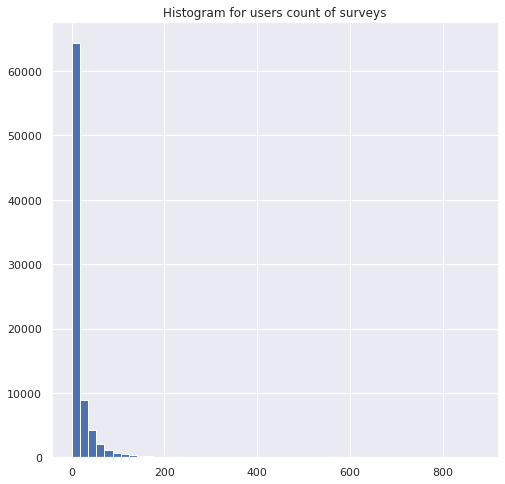

In [6]:
plt.figure(figsize=(8,8))
plt.hist(data['user'].value_counts(), bins = 50)
plt.title( 'Histogram for users count of surveys')
plt.show()

In [7]:
data.groupby(['user'] )['survey'].count().value_counts(1) # a lot of users make 1-2 surveya (maybe a cold start problem)


1      0.200383
2      0.121310
3      0.083019
4      0.066201
5      0.050526
         ...   
347    0.000012
379    0.000012
318    0.000012
876    0.000012
323    0.000012
Name: survey, Length: 379, dtype: float64

In [8]:
data ['date'].min()

Timestamp('2020-06-24 08:16:25')

In [9]:
data ['date'].max()

Timestamp('2020-06-28 04:16:08')

In [10]:
data ['date'].max()- data ['date'].min()

Timedelta('3 days 19:59:43')

In [11]:
date_survey_lifetime =  data.groupby( ['survey']).agg( {'date' : [ 'max' ,'min']} )

In [12]:
date_survey_lifetime.columns = ['end', 'start']

In [13]:
date_survey_lifetime['lifetime'] = (date_survey_lifetime['end'] - date_survey_lifetime['start'])/pd.Timedelta(1, unit ='D')



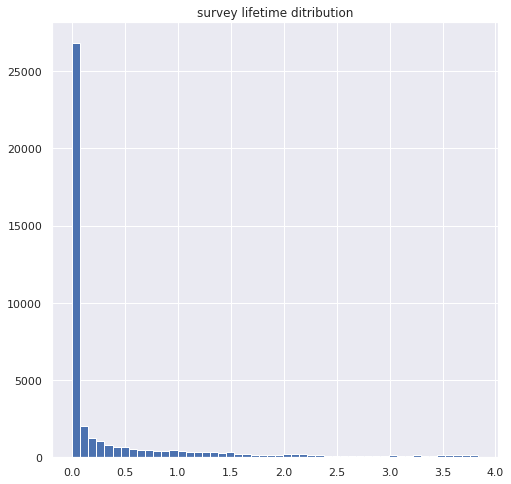

In [14]:
plt.figure(figsize=(8,8))
plt.hist(date_survey_lifetime['lifetime'] , bins = 50)
plt.title('survey lifetime ditribution')
plt.show()


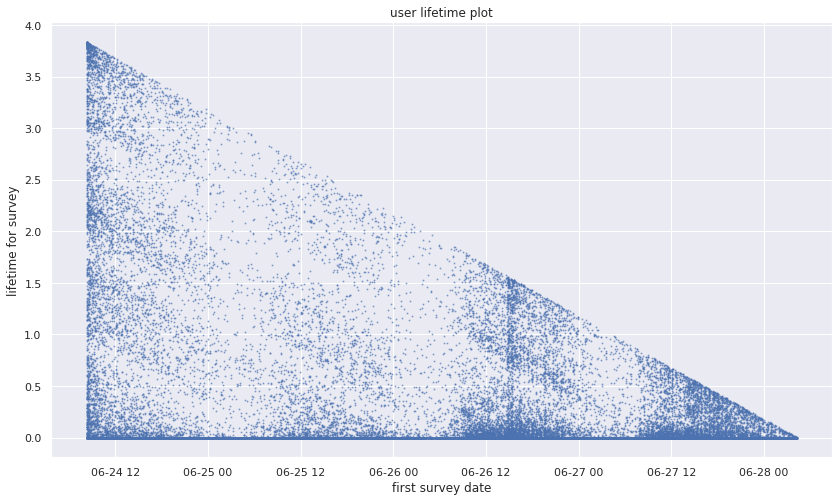

In [15]:
plt.figure(figsize=(14,8))
plt.scatter( date_survey_lifetime['start'],  date_survey_lifetime['lifetime']   , s= 1, alpha = 0.5)
plt.title('user lifetime plot')
plt.xlabel('first survey date')
plt.ylabel('lifetime for survey')
plt.show()

In [16]:
date_user_lifetime =  data.groupby( ['user']).agg( {'date' : [ 'max' ,'min']} )

In [17]:
date_user_lifetime.columns = ['end', 'start']

In [18]:
date_user_lifetime['lifetime'] = (date_user_lifetime['end'] - 
                                  date_user_lifetime['start'])/pd.Timedelta(1, unit ='D')

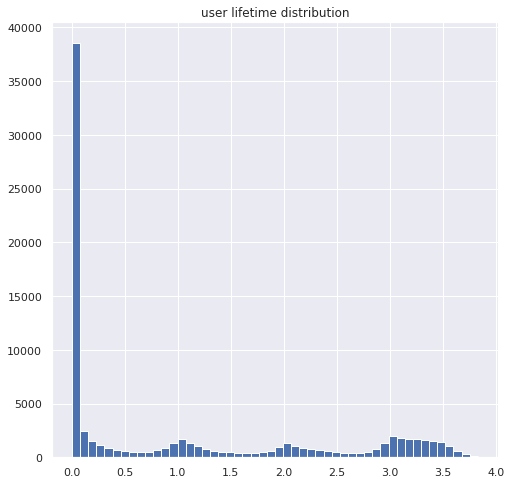

In [19]:
plt.figure(figsize=(8,8))
plt.hist(date_user_lifetime['lifetime'] , bins = 50)
plt.title('user lifetime distribution')
plt.show()


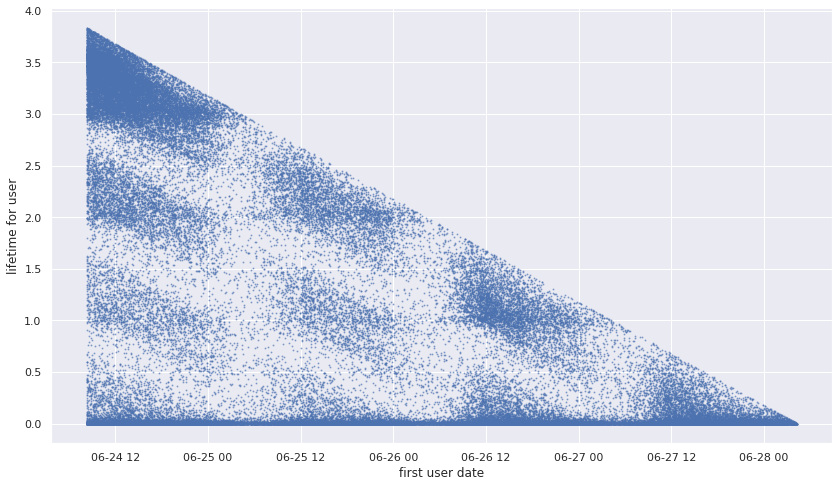

In [20]:
plt.figure(figsize=(14,8))
plt.scatter( date_user_lifetime['start'],     date_user_lifetime['lifetime']   , s= 1, alpha = 0.5)
plt.xlabel('first user date')
plt.ylabel('lifetime for user')
plt.show()

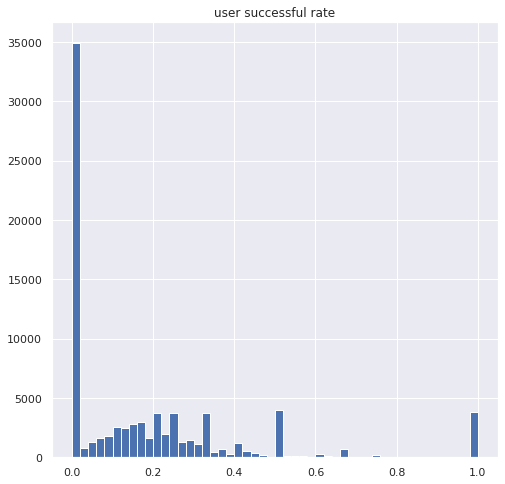

In [21]:
plt.figure(figsize=(8,8))
plt.hist(data.groupby(['user'])['status'].mean() , bins = 50)
plt.title('user successful rate')
plt.show()


In [22]:
data_user_status = data.groupby( ['user'] ).agg( { 'status': ['mean', 'count'] }  )
data_user_status.columns = ['mean_status' , 'count_status']

In [23]:
data_user_status

,mean_status,count_status
user,,
40881,0.0,5
43281,0.0,9
46035,0.0,1
47667,0.0,7
48396,0.0,7
...,...,...
62078010,0.0,1
62078025,0.0,1
62078061,0.0,3


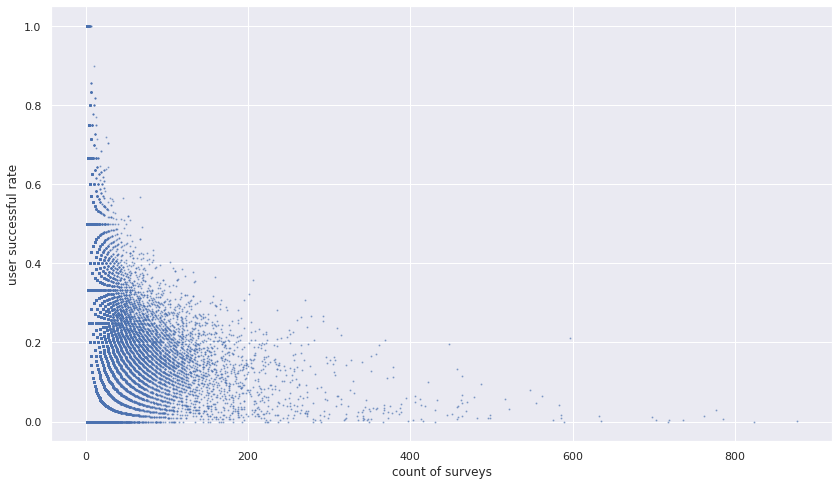

In [24]:
plt.figure(figsize=(14,8))
plt.scatter( data_user_status['count_status'] , data_user_status['mean_status'], s= 1, alpha = 0.5)
plt.ylabel('user successful rate')
plt.xlabel('count of surveys')
plt.show()

In [25]:
data_user_status.loc [data_user_status['mean_status'] == 0, :].sort_values(by= 'count_status',
                                                                           ascending= False)

,mean_status,count_status
user,,
61398273,0.0,823
61400589,0.0,717
57260376,0.0,589
61797513,0.0,430
31038198,0.0,366
...,...,...
60527172,0.0,1
60525450,0.0,1
60522513,0.0,1


In [26]:
data_user_status.loc [data_user_status['mean_status'] <0.01, :].sort_values(by= 'count_status',
                                                                           ascending= False)

,mean_status,count_status
user,,
56277972,0.001142,876
61398273,0.000000,823
61041864,0.006369,785
61398591,0.004076,736
60967047,0.002782,719
...,...,...
61487397,0.000000,1
31193805,0.000000,1
61487748,0.000000,1


### There are anomaly users that pass no or a very few surveys

In [27]:
data_survey_status = data.groupby( ['survey'] ).agg( { 'status': ['mean', 'count'] }  )
data_survey_status.columns = ['mean_status' , 'count_status']

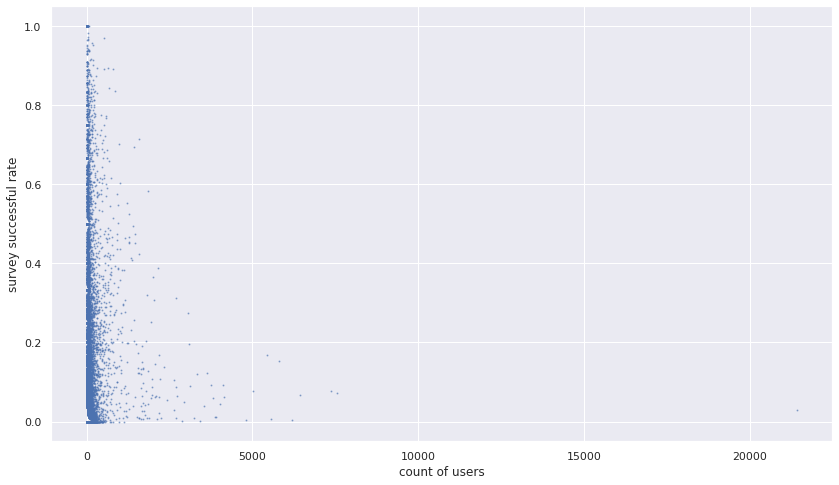

In [28]:
plt.figure(figsize=(14,8))
plt.scatter( data_survey_status['count_status'],
            data_survey_status['mean_status']  , s= 1, alpha = 0.5)
plt.ylabel('survey successful rate')
plt.xlabel('count of users')
plt.show()

In [29]:
data_survey_status.loc [data_survey_status['mean_status'] == 0, :].sort_values(by= 'count_status', 
                                                                               ascending= False)



,mean_status,count_status
survey,,
100000370,0.0,1129
100000453,0.0,988
100002751,0.0,800
100001043,0.0,745
100001775,0.0,715
...,...,...
100026163,0.0,1
100026164,0.0,1
100026165,0.0,1


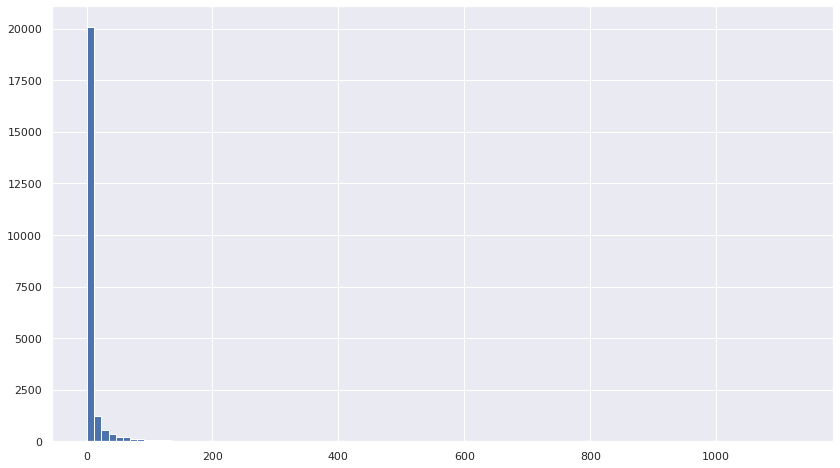

In [30]:
plt.figure(figsize=(14,8))
plt.hist(data_survey_status.loc [data_survey_status['mean_status'] == 0, 'count_status'], bins =100)
plt.show()

In [31]:
data_survey_status.loc [data_survey_status['mean_status'] <0.001, :].sort_values(by= 'count_status', 
                                                                               ascending= False)



,mean_status,count_status
survey,,
100000370,0.0,1129
100000453,0.0,988
100002751,0.0,800
100001043,0.0,745
100001775,0.0,715
...,...,...
100026163,0.0,1
100026164,0.0,1
100026165,0.0,1


# There are anomaly surveys thatno one can pass them